In [1]:
import mysql.connector as connection
import csv
import os

## Reading the carbon_nanotube raw data

In [2]:
file_to_list=[]
with open("carbon_nanotubes.csv","r") as f:
    data = csv.reader(f,delimiter='\n')
    #print(data)
    for i in data:
        #print(i)
        file_to_list.append(i[0].split(';'))

f.close()
print(file_to_list[1])

['2', '1', '0,679005', '0,701318', '0,017033', '0,721039', '0,730232', '0,017014']


## Writing the Updated data into csv

In [3]:
with open('carbon_nanotubes_updated.csv',"w",newline='') as data:
    writer = csv.writer(data)
    writer.writerows(file_to_list)

## Conneting to mysql database

In [4]:
try:
    mydb = connection.connect(host="localhost", user="root", passwd="mysql", use_pure=True)
    print(mydb.is_connected())
    
    query = "Create Database CarbonNanoTubes;"
    cursor = mydb.cursor()
    cursor.execute(query)
    print("Data Base created!!")
    
except Exception as e:
    mydb.close()
    print(e)

True
Data Base created!!


## Creating Table in the Data Base

In [5]:
query = "Create table CarbonNanoTubes.carbon_nanotubes( Chiral_indice_n int(10), Chiral_indice_m int(10), Initial_atomic_coordinate_u varchar(20), Initial_atomic_coordinate_v varchar(20), Initial_atomic_coordinate_w varchar(20), Calculated_atomic_coordinates_u varchar(20), Calculated_atomic_coordinates_v varchar(20), Calculated_atomic_coordinates_w varchar(20)  )"
cursor.execute(query)
print("Table Created!!")

Table Created!!


## Inserting data into Table

In [6]:
with open("carbon_nanotubes_updated.csv",mode='r') as f:
    data = csv.reader(f, delimiter='\n')
    next(data)
    for j in data:
        query="Insert into CarbonNanoTubes.carbon_nanotubes values({});".format(', '.join([value for value in j]))
        cursor.execute(query)
mydb.commit()
f.close()
print("Values Inserted")

Values Inserted


### Inserted table values from sqworkbench

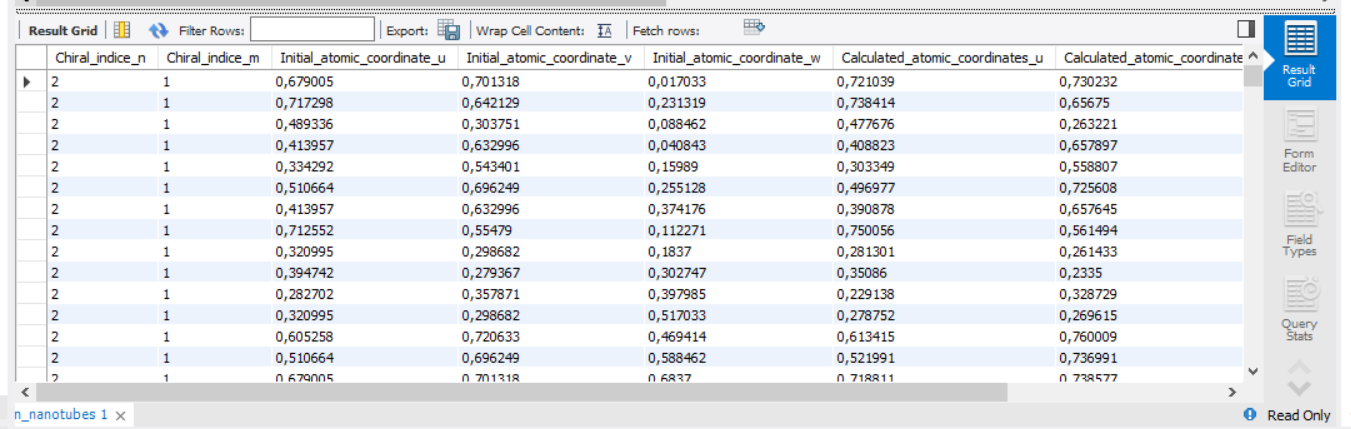